In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

file_path = "C:/Users/deepu/Downloads/archive/Nutrition__Physical_Activity.csv"
data = pd.read_csv(file_path)


Mean Squared Error: 104.56729885937986


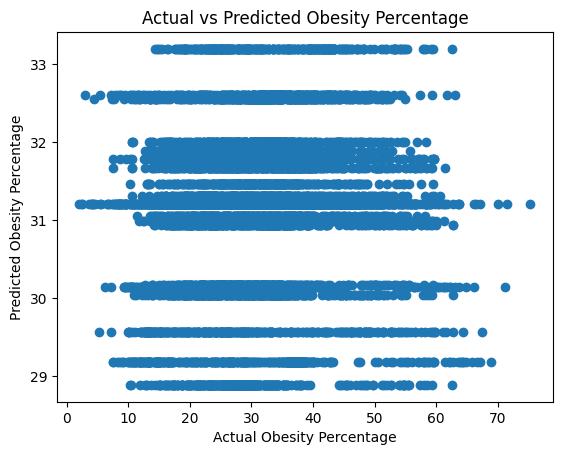

In [5]:
data = data[data['Age(years)'] != '65 or older']

features = ['Age(years)', 'Education', 'Gender', 'Income']

X = pd.get_dummies(data[features], columns=['Age(years)', 'Education', 'Gender', 'Income'])

y = data['Data_Value']

missing_values_indices = y.dropna().index
X = X.loc[missing_values_indices]
y = y.dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Obesity Percentage')
plt.ylabel('Predicted Obesity Percentage')
plt.title('Actual vs Predicted Obesity Percentage')
plt.show()